# <span style="color:darkblue"> Lecture 21 - Time Data </span>

<font size = "5">

In  the last lecture we ...
- Completed the module on SQL
- Learned about escape characters


In  this lecture we will ...

- Process time data in Python
- Learn about wildcards

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs
# "maplotlib.dates" has advanced options for plotting dates
# "datetime" handles date information

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

Import data

In [2]:
financial = pd.read_csv("data_raw/financial.csv")

<font size = "5">

"Parse" time columns

In [3]:
# Convert string column to datetime format
# If the date format is simple, you can also parse on input as
# financial = pd.read_csv("data_raw/financial.csv",parse_dates = ["date"]
# See advanced options for parsing further in the lecture...

financial["date"] = pd.to_datetime(financial["date_str"])

<font size = "5">

Check Types

In [4]:
# Standard data types are "int", "str", "float", and "bool"
# There is also a "datetime" types

financial.dtypes

Unnamed: 0             int64
date_str              object
sp500                float64
djia                 float64
date_ex1              object
date_ex2              object
date_ex3              object
date          datetime64[ns]
dtype: object

<font size = "5">

Visualize time data

Text(0.5, 1.0, 'The evolution of the stock market')

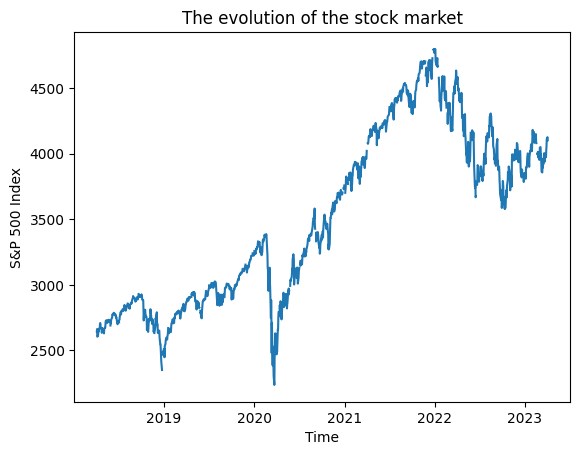

In [4]:
# plt.plot() is used to create line plots
# The first two arguments are column names for the (x,y) data
# The third argument is the data

plt.plot("date", "sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("S&P 500 Index")
plt.title("The evolution of the stock market")


<font size = "5">

S&P 500 tracks the average performance of <br>
of the largest companies in the US stock market

$\quad$ https://en.wikipedia.org/wiki/S%26P_500 <br>
$\quad$ https://fred.stlouisfed.org/series/SP500

<font size = "5">

Try it yourself!

- Generate a line plot which has the Dow Jones <br>
Industrial Index ("djia") on the y-axis and <br>
"date" on the x-axis.

Text(0.5, 1.0, 'The evolution of the Stock market')

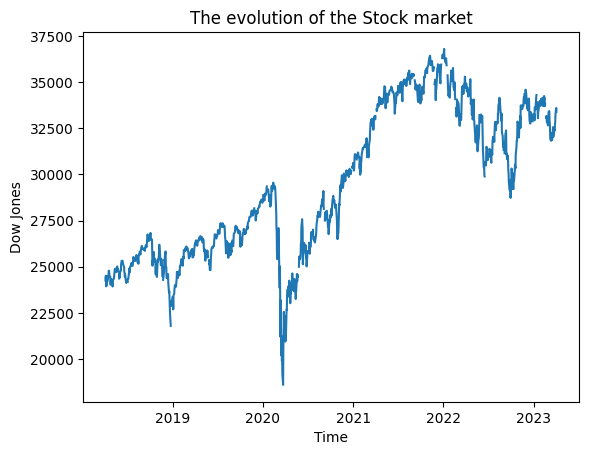

In [5]:
# Write your own code

plt.plot("date", "djia", data = financial)
plt.xlabel("Time")
plt.ylabel("Dow Jones")
plt.title("The evolution of the Stock market")


# <span style="color:darkblue"> II. Dates + Wild Cards  </span>

<font size = "5">

Convert to string (a)


- A wildcard ```%``` is used to denote date formats
- Useful when working with text data

$\quad$ <img src="figures/wildcards_fig1.png" alt="drawing" width="300"/>

In [6]:
# "String from time" .dt.strftime()
# The first argument needs to be a datetime type 
# The second argument is the format you want to use
# Note: "dt" stands for datatime

financial["month_str"] = financial["date"].dt.strftime("%m")
financial["week_str"]  = financial["date"].dt.strftime("%W")


<font size = "5">

Convert to string (b)

$\quad$ <img src="figures/wildcards_fig2.png" alt="drawing" width="400"/>

In [7]:
financial["monthname"]   =  financial["date"].dt.strftime("%B")
financial["weekdayname"] =  financial["date"].dt.strftime("%A")

<font size = "5">

Personalized format

In [8]:
# Insert wildcards inside custom strings
# Internally it will "fill-in-the-blank" with the corresponding information
# You can use commas, dashes (--), slash (/) or other characters

message_monthname =  financial["date"].dt.strftime("This is the month of %B")
message_monthday  =  financial["date"].dt.strftime("The day of the week is %A")
message_yearmonth =  financial["date"].dt.strftime("%Y-%m")

display(message_yearmonth)


0       2018-04
1       2018-04
2       2018-04
3       2018-04
4       2018-04
         ...   
1300    2023-03
1301    2023-03
1302    2023-03
1303    2023-04
1304    2023-04
Name: date, Length: 1305, dtype: object

<font size = "5">

Try it yourself!

- Create a new column called "date_test" <br>
  which has the format using ```.dt.strftime()```
  
$\quad$ ```Monday, December 31, 2023 ```

In [11]:
# Write your own code


financial["date_test"] = financial["date"].dt.strftime("%A, %B %d, %Y")
print(financial["date_test"])



0       Wednesday, April 04, 2018
1        Thursday, April 05, 2018
2          Friday, April 06, 2018
3          Monday, April 09, 2018
4         Tuesday, April 10, 2018
                  ...            
1300    Wednesday, March 29, 2023
1301     Thursday, March 30, 2023
1302       Friday, March 31, 2023
1303       Monday, April 03, 2023
1304      Tuesday, April 04, 2023
Name: date_test, Length: 1305, dtype: object


# <span style="color:darkblue"> III. Data Operations </span>

<font size = "5">

Parsing + wild cards

$\quad$ <img src="figures/wildcards_fig3.png" alt="drawing" width="400"/>

In [12]:
# Combine wildcards + characters depending on the input
# Can include spaces, commas, "/", "-" or any other formatting
# Be careful to include the wildcar letters in upper or lower case 
# depending on the intended format 

date1 = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
date2 = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")

<font size = "5">

Period grouping

In [13]:
# In "freq" specify the letter for the level of aggregation
# year (y), month (m), week (w), day(d)
# There are also more advanced options! See documentation

financial["week"] = financial["date"].dt.to_period(freq = "w")

<font size = "5">

Aggregate by period

In [14]:
# Group on the period column
# We use a wrapper () to split the command into multiple lines
# We could also use escape characters \ instead

weeklydata = (financial
              .groupby("date") 
              .agg( sp500_mean = ("sp500","mean")))

<font size = "5">

Try it yourself!

- Practice ```pd.to_datetime()```
- Parse the column "data_ex3"
- Take a close look at the formatting

HINT: Refer to the table of wildcards <br>
 in the previous section


In [16]:
# Write your own code


date3 = pd.to_datetime(financial["date_ex3"],format = "%b-%d, %y")




<font size = "5">



In [26]:
financial["month"] = financial["date"].dt.to_period(freq = "m")

monthlydata = (financial
              .groupby("month") 
              .agg( djia_mean = ("djia","mean"), 
              djia_sd = ("djia", "std")))



TypeError: plot got an unexpected keyword argument 'y'

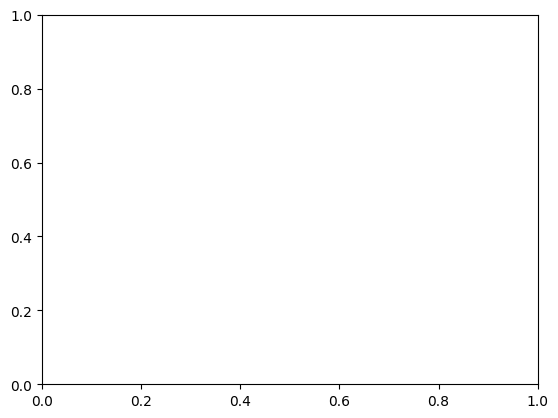

In [25]:
plt.plot("month", "djia_mean", data = monthlydata)
plt.xlabel("Month")
plt.ylabel("Mean of sp500")
plt.title("Evolution of the Stock market")

# <span style="color:darkblue"> IV. Additional Material </span>

<font size = "5">

Full list of wild cards:

- More fine-grained, e.g. microseconds, etc.
- Other formats, e.g. time zone, "AM/PM", etc.

https://www.w3schools.com/python/python_datetime.asp